# Trabajo Final procesamiento de lenguaje natural (NLP) <a class="tocSkip">
## Universidad Pontificia Bolivariana <a class="tocSkip">

**Estudiante:** Mariana Franco Gallego

**ID:** 1017272701



**Subir Este notebook de Trabajo Final en su repositorio de GitHub. y enviar el link en **Microsoft TEAMS**

Docente: [Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Objetivo del Trabajo
Realizar un proceso de Procesamiento de lenguaje natural (NLP) para dejar los datos preparados para ser usados con algoritmos de Machine Learning para Clasificación como objetivo final del trabajo.

los datos preparados para ser usados con algoritmos de Machine Learning para Regresión o Clasificación como objetivo final del trabajo.

El trabajo se realizara en este jupyter notebook y subirlo a su repositorio de github creado en clase. (**Recuerde poner su nombre e información**)

## Las actividades a realizar
    

1) Limpiar los datos de texto.

   - https://joserzapata.github.io/courses/nlp/procesamiento-basico/

   - https://joserzapata.github.io/courses/nlp/preprocesamiento-texto/

2) Realizar la representación de texto:

   - https://joserzapata.github.io/courses/nlp/representaciones/

   - Tokenización
   - Lematización o stemming
   - Representación de los datos de texto (Bag of Words o TF-IDF)

3) Utilice un modelo de Machine Learning para clasificación para entrenar y evaluar el modelo.
        
    - Calcule estas las métricas de evaluación (accuracy, precision, recall, f1-score) - https://joserzapata.github.io/courses/python-ciencia-datos/clasificacion/#evaluacion-modelo-simple


    
   
    
*NOTA: No dude en contactarme para cualquier pregunta o inquietud :) por el chat de Teams o al correo
joser.zapata@upb.edu.co*

## EVALUACIÓN


|Porcentaje en la evaluación | Descripción| Nada | Incompleto | Completo 
| :---: |:---: |:---: |:---: |:---: 
| 5 % |**limpieza de los datos** |
| 5 % | **Representacion de los datos** |
| 5 % | **Machine Learning** <br> Entrenar y evaluar el modelo propuesto |


In [4]:
!pip install scikit-learn pandas nltk


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.7 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.7 MB 4.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 4.2 MB/s eta 0:00:02
   ------------------- -------------------- 4.2/8.7 MB 4.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 4.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 4.3 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 5.0 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)
from sklearn.model_selection import train_test_split

Carga del dataset

El archivo  se carga en aproximadamente 10 segundos

In [1]:
!pip install pyarrow

!pip install --upgrade pyarrow

!pip install --upgrade --quiet pyarrow fastparquet fsspec



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Usar su ID UPB Ejemplo: "0028989847"
import pandas as pd

id_upb = "000580948"  # tu ID
URL = "https://www.dropbox.com/scl/fi/gvk9yj8cn96oocr9z058x/filmaffinity_reviews_dataset.parquet?rlkey=xgvr00zvkxbkwqqavqutpsshg&st=xjb7xze9&dl=1"

# 1) Intenta con fastparquet (evita el conflicto de pyarrow)
data_reviews = pd.read_parquet(URL, engine="fastparquet")
data_reviews = data_reviews.sample(n=50_000, random_state=int(id_upb))
data_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 23001 to 22577
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_review_desc  50000 non-null  object
 1   author_rating       50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


Ejemplo de algunas filas del dataset

In [3]:
data_reviews.sample(5)

,author_review_desc,author_rating
117164,\nHacía bastante tiempo que no me daba por esc...,3
59655,\nEn muchos aspectos me recuerda al viaje de C...,8
45777,"\nLo que para algunos es una tomadura de pelo,...",7
144603,\nLa racha de películas de Marvel abanderada p...,5
109583,"\nEn el desenlace de ""No es País para Viejos"",...",7


Evaluar los valores nulos

In [4]:
data_reviews.isnull().sum()

author_review_desc    0
author_rating         0
dtype: int64

En este caso no hay nulos.

Revisar si hay valores duplicados:

In [5]:
data_reviews.duplicated().sum()

np.int64(3)

No hay  valores duplicados.

## Clasificación Tradicional para Análisis de Sentimientos y Categorías 👍 👎



Definición: Se considera reseña positiva cuando la puntuación ("author_rating") es mayor que 6; negativa en caso contrario.

Crear la variable binaria de sentimiento: 1 (positivo) si author_rating > 6, 0 (negativo) de lo contrario

In [6]:
UMBRAL = 6
data_reviews["sentiment_bin"] = (data_reviews["author_rating"] > UMBRAL).astype(int)

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_data = data_reviews["author_review_desc"]
y_data = data_reviews["sentiment_bin"]


Dividir el dataset en entrenamiento y prueba

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    stratify=y_data,  # Mantener la proporción de clases en ambos conjuntos
    random_state=42,
)

## Análisis exploratorio de los datos

para determinar que tipo de limpieza se debe realizar a los datos de texto de `X_train`

In [12]:
# Mostrar ejemplos de reseñas del set de entrenamiento
for i in range(5):
    print(f"--- Ejemplo {i + 1} ---")
    print(X_train.iloc[i])
    print()


--- Ejemplo 1 ---

Esto es un tipo, que tiene la genial idea de documentar y seguir en el tiempo la vida y andanzas de 3 personajes básicamente ladrones de poca monta, drogadictos y entresijos varios.


Aquí verás la decadencia humana de la drogadicción juntada con la mala vida, la idea en si no es que sea original, pero una recopilación documental de 40 años no la hace cualquiera y es curioso ir viendo, como los personajes que en un principio creen comerse el mundo, se van quedando sin dientes o en la miseria más absoluta, recayendo en lo mismo una y otra vez.


La hija de la mujer, es literamente dios, dándole lecciones de vida con 8 años.

Está guay verlo, solo que la calidad técnica de los primeros años al estar rodado a partir del 1984 es pésima y porsupuesto tendrás que verlo subtitulado si no sabes inglés.


--- Ejemplo 2 ---

Cuando se publicó aquel primer vídeo de unos segundos donde veíamos a Joaquin Phoenix con el vestuario de Arthur Fleck y el vestuario de Joker, allá por f

In [13]:
longitudes = X_train.apply(lambda x: len(x.split()))
print("Promedio de palabras por reseña:", longitudes.mean())
print("Reseña más corta:", longitudes.min(), "palabras")
print("Reseña más larga:", longitudes.max(), "palabras")


Promedio de palabras por reseña: 236.89135
Reseña más corta: 2 palabras
Reseña más larga: 1099 palabras


In [14]:
from collections import Counter

# Contar palabras más comunes
todas_palabras = " ".join(X_train).split()
palabras_frecuentes = Counter(todas_palabras).most_common(20)
print("Palabras más comunes:")
for palabra, freq in palabras_frecuentes:
    print(palabra, ":", freq)


Palabras más comunes:
de : 504947
que : 369374
la : 308778
y : 269570
en : 210011
el : 186347
a : 177638
un : 134837
una : 121870
es : 121247
los : 106512
no : 105551
con : 103567
se : 99814
por : 81212
lo : 75306
del : 73615
su : 70401
las : 64255
como : 60130


## 1) Limpieza de los datos de texto

Tomar los datos de `X_train` y aplicar las funciones de limpieza que considere necesarias

Ayudas:

- Convertir a minúsculas
- Eliminar caracteres especiales y números
- Corregir palabras mal escritas
- etc


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Descargar recursos NLTK solo la primera vez
nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
# Función de limpieza básica
def limpiar_texto(texto):
    texto = texto.lower()  # minúsculas
    texto = re.sub(r"http\S+|www\S+", "", texto)  # eliminar URLs
    texto = re.sub(r"[^a-záéíóúüñ\s]", " ", texto)  # eliminar símbolos y números
    texto = re.sub(r"\s+", " ", texto).strip()  # espacios extra
    return texto


In [18]:
X_train_limpio = X_train.apply(limpiar_texto)
X_test_limpio = X_test.apply(limpiar_texto)


In [19]:
spanish_stopwords = set(stopwords.words("spanish"))
stemmer = SnowballStemmer("spanish")


def procesar_texto(texto):
    tokens = word_tokenize(texto)
    tokens = [t for t in tokens if t not in spanish_stopwords]  # quitar stopwords
    tokens = [stemmer.stem(t) for t in tokens]  # reducir palabras a su raíz
    return " ".join(tokens)


In [23]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

spanish_stopwords = set(stopwords.words("spanish"))
stemmer = SnowballStemmer("spanish")


In [27]:
import re

# Stopwords básicas de español (compactas). Puedes añadir más si quieres.
SPANISH_STOPWORDS_FALLBACK = {
    "a",
    "acá",
    "ahí",
    "al",
    "algo",
    "alguna",
    "algunas",
    "alguno",
    "algunos",
    "allá",
    "allí",
    "ante",
    "antes",
    "aquel",
    "aquella",
    "aquellas",
    "aquello",
    "aquellos",
    "aquí",
    "así",
    "aun",
    "aunque",
    "cada",
    "como",
    "con",
    "contra",
    "cual",
    "cuales",
    "cualquier",
    "cualquiera",
    "cuando",
    "de",
    "debe",
    "deben",
    "deber",
    "debido",
    "del",
    "desde",
    "donde",
    "dos",
    "el",
    "él",
    "ella",
    "ellas",
    "ellos",
    "en",
    "entre",
    "era",
    "eran",
    "eres",
    "es",
    "esa",
    "esas",
    "ese",
    "eso",
    "esos",
    "esta",
    "estaba",
    "estaban",
    "estado",
    "estar",
    "estará",
    "estas",
    "este",
    "esto",
    "estos",
    "estoy",
    "fue",
    "fueron",
    "ha",
    "haber",
    "había",
    "habían",
    "hace",
    "hacer",
    "hacia",
    "han",
    "hasta",
    "hay",
    "he",
    "hemos",
    "la",
    "las",
    "le",
    "les",
    "lo",
    "los",
    "más",
    "me",
    "mi",
    "mis",
    "mientras",
    "muy",
    "más",
    "nada",
    "ni",
    "no",
    "nos",
    "nosotros",
    "nuestra",
    "nuestras",
    "nuestro",
    "nuestros",
    "o",
    "os",
    "otra",
    "otras",
    "otro",
    "otros",
    "para",
    "pero",
    "poco",
    "por",
    "porque",
    "que",
    "qué",
    "quien",
    "quién",
    "quienes",
    "se",
    "sea",
    "según",
    "ser",
    "si",
    "sí",
    "siempre",
    "sin",
    "sobre",
    "sois",
    "solamente",
    "solo",
    "somos",
    "son",
    "soy",
    "su",
    "sus",
    "tal",
    "también",
    "tampoco",
    "tan",
    "tanto",
    "te",
    "tenemos",
    "tener",
    "tiene",
    "tienen",
    "toda",
    "todas",
    "todavía",
    "todo",
    "todos",
    "tu",
    "tus",
    "un",
    "una",
    "uno",
    "unos",
    "usted",
    "ustedes",
    "va",
    "vamos",
    "van",
    "y",
    "ya",
}


def limpiar_texto(texto: str) -> str:
    if not isinstance(texto, str):
        texto = str(texto)
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+", " ", texto)  # URLs
    texto = re.sub(r"@\w+|#\w+", " ", texto)  # menciones/hashtags
    texto = re.sub(r"[^a-záéíóúñü\s]", " ", texto)  # símbolos/números
    texto = re.sub(r"\s+", " ", texto).strip()  # espacios extra
    return texto


# Stemming simple opcional sin NLTK: recorta sufijos comunes (muy básico)
def pseudo_stem(token: str) -> str:
    # Pequeño recorte de sufijos frecuentes en español (opcional)
    for suf in (
        "mente",
        "ciones",
        "ciones",
        "ciones",
        "ción",
        "ciones",
        "idades",
        "idad",
        "ados",
        "adas",
        "ados",
        "idos",
        "idas",
        "ando",
        "iendo",
        "aría",
        "erías",
        "erían",
        "aré",
        "eré",
        "arás",
        "erás",
        "amos",
        "emos",
        "aron",
        "eron",
        "aba",
        "ada",
        "ida",
        "ado",
        "ido",
        "os",
        "as",
        "es",
        "s",
    ):
        if token.endswith(suf) and len(token) > len(suf) + 2:
            return token[: -len(suf)]
    return token


def procesar_texto(texto: str, usar_stemming: bool = True) -> str:
    texto = limpiar_texto(texto)
    tokens = texto.split()  # evita word_tokenize
    tokens = [t for t in tokens if t not in SPANISH_STOPWORDS_FALLBACK]
    if usar_stemming:
        tokens = [pseudo_stem(t) for t in tokens]
    return " ".join(tokens)


In [28]:
X_train_limpio = X_train.apply(limpiar_texto)
X_test_limpio = X_test.apply(limpiar_texto)

X_train_proc = X_train_limpio.apply(procesar_texto)
X_test_proc = X_test_limpio.apply(procesar_texto)

for i in range(3):
    print("ANTES:", X_train.iloc[i])
    print("DESPUÉS:", X_train_proc.iloc[i])
    print()


ANTES: 
Esto es un tipo, que tiene la genial idea de documentar y seguir en el tiempo la vida y andanzas de 3 personajes básicamente ladrones de poca monta, drogadictos y entresijos varios.


Aquí verás la decadencia humana de la drogadicción juntada con la mala vida, la idea en si no es que sea original, pero una recopilación documental de 40 años no la hace cualquiera y es curioso ir viendo, como los personajes que en un principio creen comerse el mundo, se van quedando sin dientes o en la miseria más absoluta, recayendo en lo mismo una y otra vez.


La hija de la mujer, es literamente dios, dándole lecciones de vida con 8 años.

Está guay verlo, solo que la calidad técnica de los primeros años al estar rodado a partir del 1984 es pésima y porsupuesto tendrás que verlo subtitulado si no sabes inglés.

DESPUÉS: tipo genial idea documentar seguir tiempo vida andanz personaj básica ladron poca monta drogadict entresij vari verá decadencia humana drogadic junt mala vida idea original rec

## 2) Representacion del texto

Luego de tener los datos limpios, realizar la representación de los datos de texto para poder usarse en modelos de machine learning.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [30]:
# Crear el vectorizador
vectorizador = TfidfVectorizer(
    max_features=5000,  # número máximo de palabras a usar
    ngram_range=(1, 2),  # incluye unigramas y bigramas
    stop_words=None,  # ya las quitamos antes
)

# Ajustar al entrenamiento y transformar
X_train_tfidf = vectorizador.fit_transform(X_train_proc)

# Solo transformar el test
X_test_tfidf = vectorizador.transform(X_test_proc)

print("Forma del set de entrenamiento:", X_train_tfidf.shape)
print("Forma del set de prueba:", X_test_tfidf.shape)


Forma del set de entrenamiento: (40000, 5000)
Forma del set de prueba: (10000, 5000)


In [31]:
# Mostrar las 20 primeras palabras aprendidas por el TF-IDF
print(vectorizador.get_feature_names_out()[:20])


['abajo' 'abandon' 'abandonar' 'abarca' 'abiert' 'abierta' 'abierto'
 'abismo' 'abog' 'aborda' 'abordar' 'abram' 'abre' 'abrir' 'absoluta'
 'absoluto' 'absurd' 'absurda' 'absurdo' 'abuela']


In [32]:
# En esta etapa se generó una representación numérica de los textos mediante TF-IDF.
# Esta técnica evalúa la relevancia de cada palabra dentro de un documento considerando su frecuencia global.
# Así, el modelo puede identificar qué términos son más útiles para distinguir entre reseñas positivas y negativas.


## 3) Entrenar un modelo de machine learning de clasificación

Utilizar un modelo de clasificación para entrenar y evaluar el modelo con los datos preparados.


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)


In [34]:
# Crear el modelo
modelo_nb = MultinomialNB()

# Entrenar con los vectores TF-IDF
modelo_nb.fit(X_train_tfidf, y_train)

# Predecir sobre el set de prueba
y_pred = modelo_nb.predict(X_test_tfidf)


In [35]:
# Calcular métricas principales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("F1-score:", round(f1, 3))

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))


Accuracy: 0.766
Precision: 0.766
Recall: 0.766
F1-score: 0.766

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      4644
           1       0.77      0.81      0.79      5356

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.77      0.77     10000



In [36]:
###Uso de otro Modelo para comparar

from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(X_train_tfidf, y_train)
y_pred_lr = modelo_lr.predict(X_test_tfidf)

print("Accuracy (Logistic Regression):", round(accuracy_score(y_test, y_pred_lr), 3))


Accuracy (Logistic Regression): 0.795


### Evaluar el modelo con los datos de prueba

Usar el modelo para predecir en `X_test` y evaluar con `y_test`

**Nota:** Recuerde que `X_test` debe pasar por los mismos procesos de limpieza y representación que `X_train`

In [37]:
# Usar el modelo entrenado para predecir sobre los datos de prueba
y_pred = modelo_nb.predict(X_test_tfidf)

# Evaluar el rendimiento con métricas de clasificación
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("🔹 Accuracy:", round(accuracy, 3))
print("🔹 Precision:", round(precision, 3))
print("🔹 Recall:", round(recall, 3))
print("🔹 F1-score:", round(f1, 3))
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))


🔹 Accuracy: 0.766
🔹 Precision: 0.766
🔹 Recall: 0.766
🔹 F1-score: 0.766

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      4644
           1       0.77      0.81      0.79      5356

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.77      0.77     10000



In [40]:
!pip install seaborn matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 3.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.1 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.3 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 4.3 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 4.5 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.3 MB 6.7 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 4.7 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


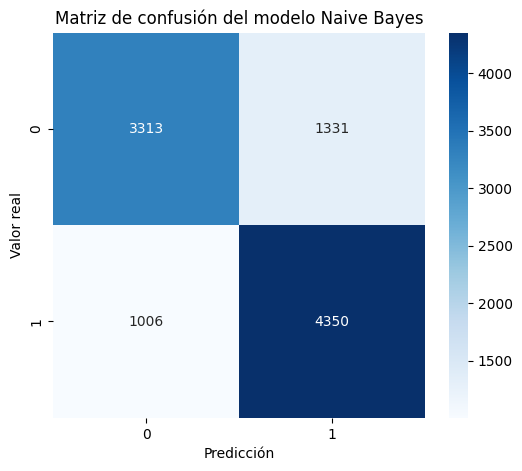

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión del modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()


In [ ]:
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)


In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7663
Precision: 0.765710262277768
Recall: 0.8121732636295743
F1 Score: 0.7882576787170427
ROC AUC Score: 0.762783444906949
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      4644
           1       0.77      0.81      0.79      5356

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.77      0.77     10000



**Guardar el modelo**

In [45]:
import joblib

## Librerías Usadas

In [47]:
!pip install watermark



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from watermark import watermark

print(watermark(python=True, iversions=True, globals_=globals()))

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.6.0

pandas    : 2.3.3
matplotlib: 3.10.7
watermark : 2.5.0
nltk      : 3.9.2
seaborn   : 0.13.2
re        : 2.2.1
sklearn   : 1.7.2
joblib    : 1.5.2



---

## Referencias
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html)
- Ejemplo de Entrenamiento y selección de Modelo de machine learning entre varios modelos <https://joserzapata.github.io/post/ciencia-datos-proyecto-python/6-model_selection/>
- https://joserzapata.github.io/courses/python-ciencia-datos/python/
- https://joserzapata.github.io/courses/python-ciencia-datos/pandas/
- https://joserzapata.github.io/courses/python-ciencia-datos/machine-learning/

Docente: [Jose R. Zapata](https://joserzapata.github.io)

- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- [https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/](https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/)